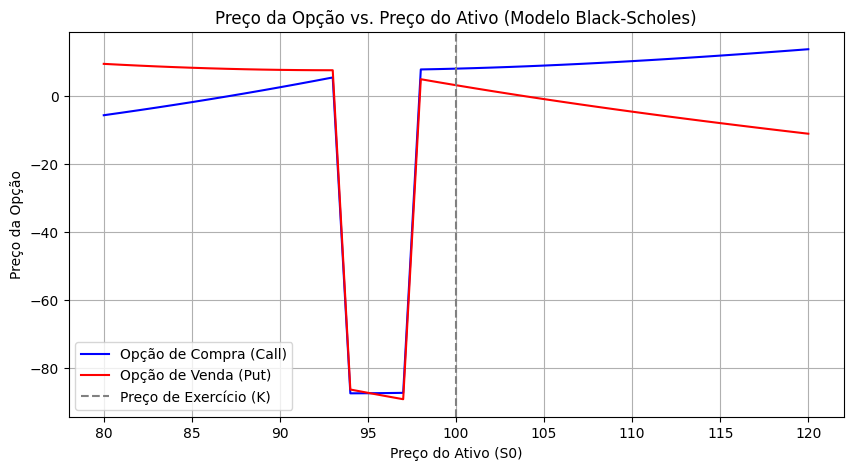

Planilha 'black_scholes.xlsx' gerada com sucesso!


In [2]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

def normal_cdf_simpson(x, n=1000):
    if x < 0:
        return 1 - normal_cdf_simpson(-x, n)

    f = lambda t: np.exp(-t**2 / 2) / np.sqrt(2 * np.pi)
    a, b = 0, x
    h = (b - a) / n
    integral = f(a) + f(b)

    for i in range(1, n, 2):
        integral += 4 * f(a + i * h)
    for i in range(2, n-1, 2):
        integral += 2 * f(a + i * h)

    return (h / 3) * integral

def black_scholes(S0, K, T, r, sigma, option_type="call"):
    # Preço de uma opção
    d1 = (np.log(S0 / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)

    N_d1 = normal_cdf_simpson(d1)
    N_d2 = normal_cdf_simpson(d2)

    if option_type == "call":
        return S0 * N_d1 - K * np.exp(-r * T) * N_d2
    elif option_type == "put":
        return K * np.exp(-r * T) * normal_cdf_simpson(-d2) - S0 * normal_cdf_simpson(-d1)
    else:
        raise ValueError("O tipo da opção deve ser 'call' ou 'put'.")

# Parâmetros:
K = 100
T = 1      # 1 ano
r = 0.05   # 5% aa
sigma = 0.2 # 20% aa)

# Gerar preços para diferentes valores de S0:
S0_values = np.arange(80, 121, 1)  # De 80 a 120 em passos de 1
call_prices = [black_scholes(S0, K, T, r, sigma, "call") for S0 in S0_values]
put_prices = [black_scholes(S0, K, T, r, sigma, "put") for S0 in S0_values]

# Geração da planilha Excel:
df = pd.DataFrame({"S0": S0_values, "Call Price": call_prices, "Put Price": put_prices})
df.to_excel("black_scholes.xlsx", index=False)

# Gráficos:
plt.figure(figsize=(10, 5))
plt.plot(S0_values, call_prices, label="Opção de Compra (Call)", color="blue")
plt.plot(S0_values, put_prices, label="Opção de Venda (Put)", color="red")
plt.axvline(K, color="gray", linestyle="--", label="Preço de Exercício (K)")
plt.xlabel("Preço do Ativo (S0)")
plt.ylabel("Preço da Opção")
plt.title("Preço da Opção vs. Preço do Ativo (Modelo Black-Scholes)")
plt.legend()
plt.grid()
plt.show()

print("Planilha 'black_scholes.xlsx' gerada com sucesso!")